VADER, part of NLTK, is a sentiment analysis that includes intensifier analysis. Words such as very, tremendously, etc... are counted toward positive and negative scores for sentences. With that enhanced ability, each sentence's positivity, neutrality, negativity, and compound nature is scored by VADER and plotted for the entire debate. Additionally, it is then averaged across each answer by a candidate for a final debate score.

##Charts
Included are two charts and one print out. The printout is the mean and standard deviation of each question within the debate while the charts plot the total number of questions asked along with the number of answers each candidate provided. It is not assured that these two numbers will sum to be equal. The other chart is a box plot of the mean and standard deviation data for each debate.


Hillary Clinton comes in on the Democratic side as being semantically more positive than Sanders.

When looking at the final 5 toward the end of the primary season, Clinton is significantly higher than the others while Cruz and Kasich are mostly identical in terms of mean and distribution of their debate performances.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

from matplotlib import pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import defaultdict
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
debates = pd.read_csv("primary_debates_cleaned.csv")
debates = debates[debates.Speaker != 'AUDIENCE']
debates = debates[debates.Speaker != 'CANDIDATES']
debates = debates[debates.Speaker != 'BELL']
debates = debates[debates.Speaker != 'UNKNOWN']
debates = debates[debates.Speaker != 'OTHER']

debates_list = []
debates_location = []
for location in debates.Location.unique():
    debates_list.append(debates[debates.Location == location])
    debates_location.append(location)
debates_location

['Milwaukee, Wisconsin',
 'Miami, Florida',
 'Charleston, South Carolina',
 'Greenville, South Carolina',
 'Cleveland, Ohio',
 'Boulder, Colorado',
 'Las Vegas, Nevada',
 'Manchester, New Hampshire',
 'North Charleston, South Carolina',
 'Flint, Michigan',
 'Brooklyn, New York',
 'Des Moines, Iowa',
 'Durham, New Hampshire',
 'Detroit, Michigan',
 'Houston, Texas',
 'Simi Valley, California']

In [ ]:
def score_speaker(speaker_df):
    df_dict = {}
    for i,response in speaker_df.iterrows():
        scorer = SentimentIntensityAnalyzer()
        scores = scorer.polarity_scores(response.Text)
        df_dict[i] = scores
    df = pd.DataFrame.from_dict(df_dict)
    df = df.T
    diff_score = df['pos'] - df['neg']
    return diff_score

In [ ]:
def compile_dicts(debates_location, debates_list):
    master_scores_dict = defaultdict(list)
    master_debates_means = []
    for location in range(len(debates_location)):
        speaker_scores = {}
        print(debates_location[location])
        debate = debates_list[location]
        # Print the number of times a candidate spoke
        #speaker_answers = debate.Speaker.value_counts()
        #speaker_answers.plot.bar()
        #plt.xticks(rotation=90)
        #plt.show()
        # Assemble the polarity scores for each time the speaker spoke
        for speaker in debate.Speaker.unique():
            polarity_score = score_speaker(debate[debate.Speaker == speaker])
            speaker_scores[speaker] = polarity_score
            master_scores_dict[speaker].append(polarity_score)
        speaker_scores_df = pd.DataFrame.from_dict(speaker_scores)
        # Return the mean and standard deviation of all the scores
        speaker_mean_std_df = pd.DataFrame([speaker_scores_df.mean(),speaker_scores_df.std()],index=['mean','std'])

        debate_mean_df = pd.DataFrame([speaker_scores_df.T.mean()])
        mean = debate_mean_df.mean(axis=1)
        master_debates_means.append(mean)

        print("\n<<<<<<<>>>>>\n")
        print("Mean: " + str(mean.values[0]))
        print(speaker_mean_std_df)
        print("\n<<<<<<>>>>>>\n")
    return master_scores_dict, master_debates_means

Below are the means and standard deviations of each debate printed in order

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
debater_scores, debate_means = compile_dicts(debates_location, debates_list)x

Milwaukee, Wisconsin

<<<<<<<>>>>>

Mean: 0.0694692417739628
      Woodruff     Ifill   Clinton   Sanders     Regan      Seib    Jindal  \
mean  0.121500  0.091148  0.098085  0.035345  0.141200  0.009080  0.029920   
std   0.149504  0.208310  0.149484  0.104283  0.205927  0.166224  0.115605   

      QUESTION  Christie  Huckabee  Santorum    Cavuto  Bartiromo     Baker  \
mean  0.082789  0.072763  0.050318  0.080400  0.070079   0.162872  0.112469   
std   0.162642  0.186930  0.131406  0.200205  0.172491   0.252978  0.258273   

         Trump    Carson     Rubio    Kasich      Cruz      Bush   Fiorina  \
mean -0.049886  0.041538  0.085048  0.005034 -0.009543  0.087048  0.057333   
std   0.349073  0.157788  0.130561  0.220453  0.117537  0.230835  0.134136   

          Paul  
mean  0.083576  
std   0.168950  

<<<<<<>>>>>>

Miami, Florida

<<<<<<<>>>>>

Mean: 0.08160032626427406
        Tapper    Kasich     Rubio      Cruz     Trump     Dinan      Bash  \
mean  0.087477  0.059100  0.015

#Chart of the average debate sentiment

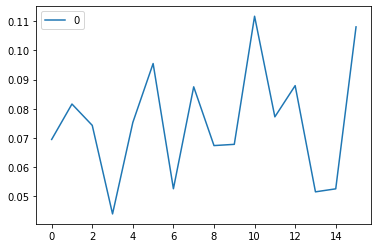

In [ ]:
debate_means_df = pd.DataFrame.from_dict(debate_means)
chart = debate_means_df.plot()

In [ ]:
plotting_df = pd.DataFrame(dtype='float')
for speaker, scores in debater_scores.items():
    s_scores = pd.Series(scores[0])
    s_scores = s_scores.rename(speaker)
    plotting_df = plotting_df.append(s_scores)

plotting_df = plotting_df.T
means = plotting_df.mean(axis=0)
std = plotting_df.std(axis=0)

#The Final 5

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


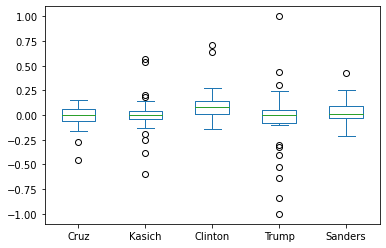

In [ ]:
plotting_df[['Cruz','Kasich','Clinton','Trump','Sanders']].plot.box()

#Means and Standard Deviations of the final 5

In [ ]:
print(means[['Cruz','Kasich','Clinton','Trump','Sanders']])
print(std[['Cruz','Kasich','Clinton','Trump','Sanders']])

Cruz      -0.009543
Kasich     0.005034
Clinton    0.098085
Trump     -0.049886
Sanders    0.035345
dtype: float64
Cruz       0.117537
Kasich     0.220453
Clinton    0.149484
Trump      0.349073
Sanders    0.104283
dtype: float64


#Republican Debates

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

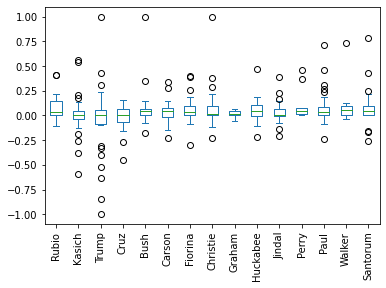

In [ ]:
plotting_df[['Rubio','Kasich','Trump','Cruz','Bush','Carson','Fiorina','Christie','Graham','Huckabee','Jindal','Perry','Paul','Walker','Santorum']].plot.box()
plt.xticks(rotation=90)

#Means and Standard Deviations

In [ ]:
print(means[['Rubio','Kasich','Trump','Cruz','Bush','Carson','Fiorina','Christie','Graham','Huckabee','Jindal','Perry','Walker','Santorum']])

Rubio       0.085048
Kasich      0.005034
Trump      -0.049886
Cruz       -0.009543
Bush        0.087048
Carson      0.041538
Fiorina     0.057333
Christie    0.072763
Graham      0.016889
Huckabee    0.050318
Jindal      0.029920
Perry       0.119556
Walker      0.088563
Santorum    0.080400
dtype: float64


In [ ]:
print(std[['Rubio','Kasich','Trump','Cruz','Bush','Carson','Fiorina','Christie','Graham','Huckabee','Jindal','Perry','Walker','Santorum']])

Rubio       0.130561
Kasich      0.220453
Trump       0.349073
Cruz        0.117537
Bush        0.230835
Carson      0.157788
Fiorina     0.134136
Christie    0.186930
Graham      0.039832
Huckabee    0.131406
Jindal      0.115605
Perry       0.168928
Walker      0.179697
Santorum    0.200205
dtype: float64
